# **INSURANCE CLAIM PREDICTION**

Since, our target column has binary values 0 and 1 we'll be using different classification algorithms to classify if the user will claim insurance or not.

For Classification, we will use following algorithms:

* Logistic Regression

* Decision Tree Classifier

* Naive Bayes

* KNN

* Random Forest Classifier

By using the above algorithms, we will firstly explore the data that we have and check for any null or missing values. If found then we'll clean tha data and then visualize it for better understanding.Then we'll proceed by data training i.e. spliting data into training and testing data.Then initialize the classifier and train our model by providing training data and once the model will be trained, we will perform prediction for the test data. At last, we will evaluate the performance of these algorithmns by error check and accuracy check.

Steps followed are as:

Step 1: Data Exploration

Step 2: Data Visualization

Step 3: Data Training

Step 4: Model Creation

Step 5: Performance Evaluation

For the dataset being used in this project [click here](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset)

## **Data Exploration**

In [67]:
import pandas as pd

In [68]:
data=pd.read_csv('/content/insurance2.csv')
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [69]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [70]:
data.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [71]:
data.shape

(1338, 8)

In [72]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [74]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [75]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [76]:
data.isnull().sum().sum()

0

Data is cleaned i.e. no missing or null values found.

Therefore no data cleaning is required.

In [77]:
#converting data into int datatype to avoid errors below.
prepareddata=data.astype(int)
prepareddata.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27,0,1,3,16884,1
1,18,1,33,1,0,2,1725,1
2,28,1,33,3,0,2,4449,0
3,33,1,22,0,0,1,21984,0
4,32,1,28,0,0,1,3866,1


In [78]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1338 non-null   int64
 1   sex             1338 non-null   int64
 2   bmi             1338 non-null   int64
 3   children        1338 non-null   int64
 4   smoker          1338 non-null   int64
 5   region          1338 non-null   int64
 6   charges         1338 non-null   int64
 7   insuranceclaim  1338 non-null   int64
dtypes: int64(8)
memory usage: 83.8 KB


## **Data Visualization**

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


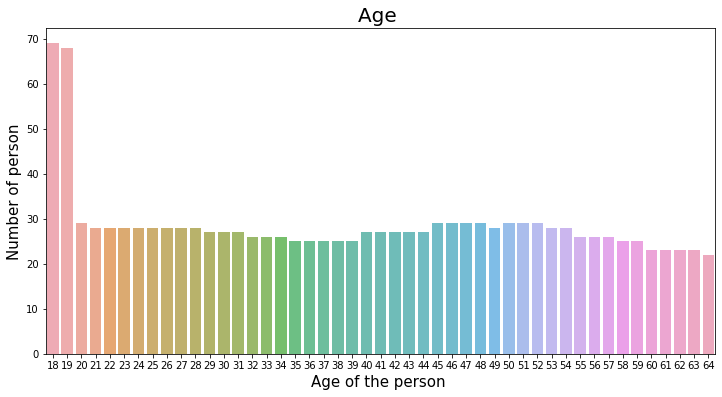

In [80]:
count=data['age'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Age ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Age of the person ", fontsize=15)
plt.show()

Maximum people are of age 18 & 19 years. 

Text(0.5, 1.0, 'Sex of the person(0:female, 1:male) ')

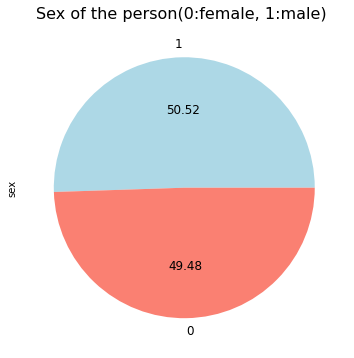

In [81]:
data['sex'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','salmon'])
plt.title("Sex of the person(0:female, 1:male) ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


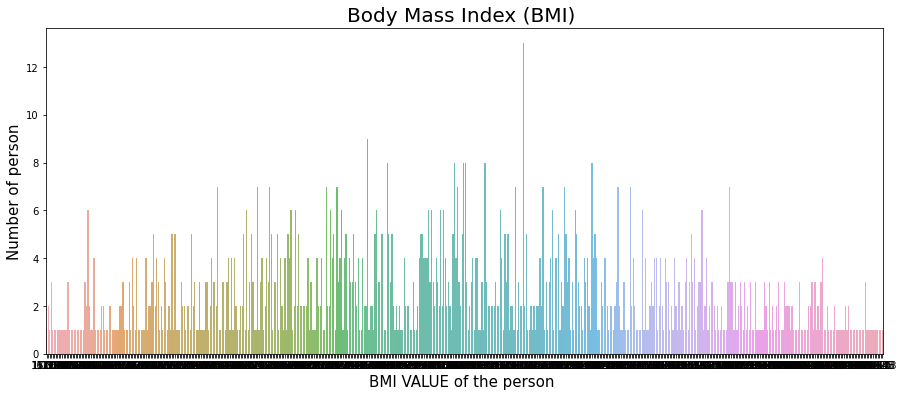

In [82]:
count=data['bmi'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Body Mass Index (BMI) ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("BMI VALUE of the person ", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


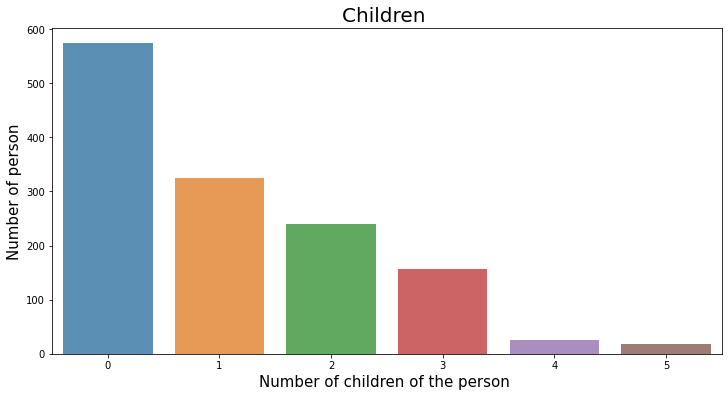

In [83]:
count=data['children'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Children ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Number of children of the person ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Smoking status of policy holder (0:non-smoker, 1:smoker) ')

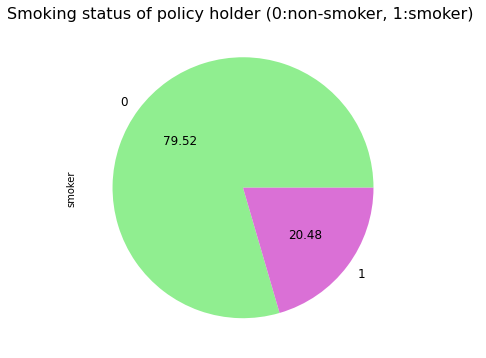

In [84]:
data['smoker'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','orchid'])
plt.title("Smoking status of policy holder (0:non-smoker, 1:smoker) ",fontsize=16)

79.52 % of policy holders are non-smokers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


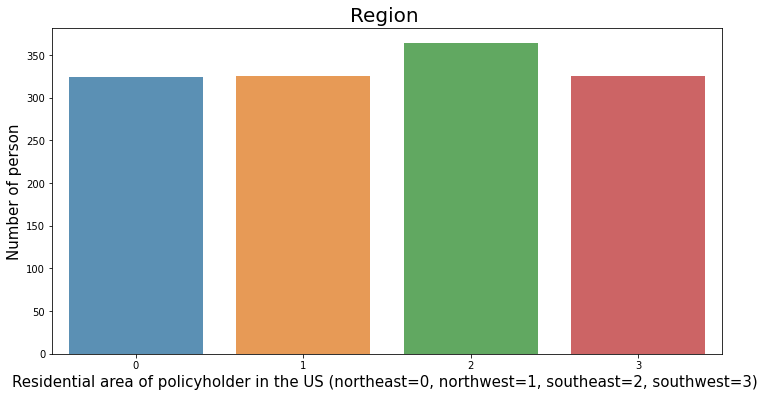

In [85]:
count=data['region'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Region ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) ", fontsize=15)
plt.show()

## **Data Training**

In [86]:
prepareddata.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [87]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1338 non-null   int64
 1   sex             1338 non-null   int64
 2   bmi             1338 non-null   int64
 3   children        1338 non-null   int64
 4   smoker          1338 non-null   int64
 5   region          1338 non-null   int64
 6   charges         1338 non-null   int64
 7   insuranceclaim  1338 non-null   int64
dtypes: int64(8)
memory usage: 83.8 KB


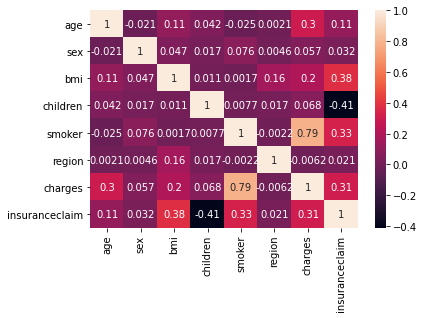

In [88]:
#to find correlation between different columns.
corr = prepareddata.corr() 
sns.heatmap(corr, annot=True)

In [89]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features for classification and y will have our target i.e. insuranceclaim.
x=prepareddata[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]  
y=prepareddata['insuranceclaim']

In [90]:
# Split data into training data and testing data.
#Ratio used for splitting training and testing data is 8:2 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100) 

## **Model Creation**

### **Logistic Regression**

In [91]:
# Importing logistic regression model
from sklearn.linear_model import LogisticRegression 
clfr1 = LogisticRegression()

In [92]:
# Fitting data into the model.
clfr1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
# Making predictions 
pred1 = clfr1.predict(x_test)

In [94]:
pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1])

In [95]:
print("Accuracy of the Logistic Regression model comes to be: \n ") 
print(clfr1.score(x_train,y_train))

Accuracy of the Logistic Regression model comes to be: 
 
0.7906542056074767


###  **Decision Tree Classifier**

In [96]:
# Importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
clfr2 = DecisionTreeClassifier()

In [97]:
#Fitting data into the model.
clfr2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
# Making predictions 
pred2 = clfr2.predict(x_test)

In [99]:
pred2

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [100]:
print("Accuracy of the Decision Tree Classifier model comes to be: \n ") 
print(clfr2.score(x_train,y_train))

Accuracy of the Decision Tree Classifier model comes to be: 
 
1.0


### **Naive Bayes** 

In [101]:
# Importing naive bayes 
from sklearn.naive_bayes import GaussianNB
clfr3 = GaussianNB()

In [102]:
#Fitting data into the model.
clfr3.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
# Making predictions 
pred3 = clfr3.predict(x_test)

In [104]:
pred3

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1])

In [105]:
print("Accuracy of the Naive Bayes model comes to be: \n ") 
print(clfr3.score(x_train,y_train))

Accuracy of the Naive Bayes model comes to be: 
 
0.7822429906542057


## **KNN**

In [106]:
#importing knn model
from sklearn.neighbors import KNeighborsClassifier
clfr4=KNeighborsClassifier(n_neighbors=20)

In [107]:
#Fitting data into the model.
clfr4.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [108]:
# Making predictions 
pred4= clfr4.predict(x_test)

In [109]:
pred4

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1])

In [110]:
print("Accuracy of the KNN model comes to be: \n ") 
print(clfr4.score(x_train,y_train))

Accuracy of the KNN model comes to be: 
 
0.6822429906542056


### **Random Forest Classifier**

In [111]:
# Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
clfr5 =RandomForestClassifier(n_estimators=100)

In [112]:
#Fitting data into the model.
clfr5.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
# Making predictions 
pred5 = clfr5.predict(x_test)

In [114]:
pred5

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [115]:
print("Accuracy of the Random Forest Classifier model comes to be: \n ") 
print(clfr5.score(x_train,y_train))

Accuracy of the Random Forest Classifier model comes to be: 
 
1.0


## **Performance Evaluation**

In [116]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t    RootMeanSquareError   \t\t   Accuracy of the model") 
print("""Logistic Regression      \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), clfr1.score(x_train,y_train)))
print("""Decision Tree Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), clfr2.score(x_train,y_train)))
print("""Naive Bayes              \t\t {:.4f}  \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), clfr3.score(x_train,y_train)))
print("""KNN                      \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), clfr4.score(x_train,y_train)))
print("""Random Forest Classifier \t\t {:.4f}  \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred5)), clfr5.score(x_train,y_train)))

Model			    RootMeanSquareError   		   Accuracy of the model
Logistic Regression      		 0.4447 	 		 0.7907
Decision Tree Classifier 		 0.1366 	 		 1.0000
Naive Bayes              		 0.4530  	 		 0.7822
KNN                      		 0.6108 	 		 0.6822
Random Forest Classifier 		 0.1833  	 		 1.0000


### Conclusion:

After performance evaluation of classification algorithms used in this project, we can conclude that decision tree classifier and random forest classifier works best as compared to logistic regression, naive bayes and KNN.